# Método da Bissecção

O método da bissecção é uma técnica numérica para encontrar raízes de funções contínuas.  
Ele funciona dividindo repetidamente um intervalo em duas partes e selecionando a subparte onde a raiz está localizada.  
Este processo continua até que a raiz seja encontrada com uma precisão desejada.

## Importação das Bibliotecas

In [1]:
!pip install numpy matplotlib tabulate sympy scipy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
import os

# Obtém o caminho absoluto do diretório do notebook
notebook_dir = os.path.abspath('')

# Adiciona o diretório pai ao sys.path para reconhecer "Graph"
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import sympy as sp
from tabulate import tabulate
from Graph.graph import plotar_funcao

## Implementação do Método da Bisseção

In [3]:
def bissecao(f, a, b, tol=1e-6):
    """
    Implementa o método da bisseção para encontrar a raiz de uma função.
    
    Parâmetros:
    f  -- Função contínua
    a  -- Extremidade esquerda do intervalo
    b  -- Extremidade direita do intervalo
    tol -- Tolerância para o erro (padrão: 1e-6)
    
    Retorna:
    raiz aproximada e tabela com as iterações
    """
    if f(a) * f(b) >= 0:
        raise ValueError("O intervalo não contém uma raiz ou possui múltiplas raízes.")
    
    max_iter = int(np.ceil(np.log2((b - a) / tol)))
    iter = 0
    tabela = []
    raiz_anterior = None
    
    while True:
        c = (a + b) / 2
        erro_absoluto = round(abs(c - raiz_anterior), 4) if raiz_anterior is not None else None
        erro_relativo = abs((c - raiz_anterior) / c) if raiz_anterior is not None else None
        tabela.append([iter, a, b, c, f(c), abs(b - a), erro_absoluto, erro_relativo])
        raiz_anterior = c
        iter += 1
        
        if erro_absoluto and erro_absoluto < tol and iter >=8:
            break
        
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return c, tabela, max_iter

## Aplicação do Método

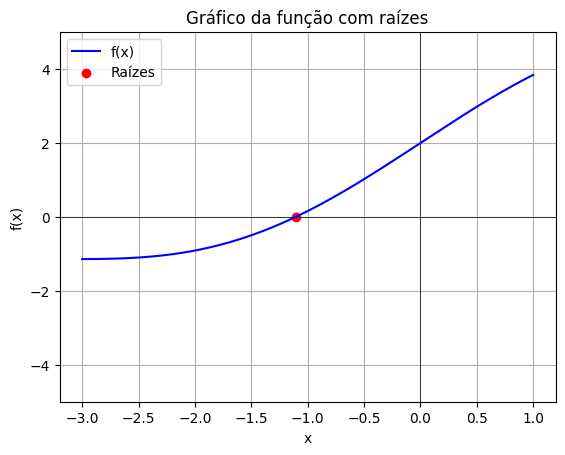

  Iteração        a        b        c     f(c)    Erro    Erro Absoluto    Erro Relativo
----------  -------  -------  -------  -------  ------  ---------------  ---------------
         0  -2.0000   0.0000  -1.0000   0.1585  2.0000
         1  -2.0000  -1.0000  -1.5000  -0.4975  1.0000           0.5000           0.3333
         2  -1.5000  -1.0000  -1.2500  -0.1990  0.5000           0.2500           0.2000
         3  -1.2500  -1.0000  -1.1250  -0.0273  0.2500           0.1250           0.1111
         4  -1.1250  -1.0000  -1.0625   0.0639  0.1250           0.0625           0.0588
         5  -1.1250  -1.0625  -1.0938   0.0179  0.0625           0.0312           0.0286
         6  -1.1250  -1.0938  -1.1094  -0.0048  0.0312           0.0156           0.0141
         7  -1.1094  -1.0938  -1.1016   0.0065  0.0156           0.0078           0.0071
         8  -1.1094  -1.1016  -1.1055   0.0009  0.0078           0.0039           0.0035
         9  -1.1094  -1.1055  -1.1074  -0.0020  0.0039 

In [4]:
# Entrada do usuário
x = sp.Symbol('x')
expressao = input("Digite a função em termos de x (ex: sin(x) + exp(x)): ")
funcao = sp.lambdify(x, sp.sympify(expressao), 'numpy')

a = float(input("Digite o limite inferior do intervalo: "))
b = float(input("Digite o limite superior do intervalo: "))
tol = float(input("Digite o limite de erro: "))

plotar_funcao(funcao, a, b)

# Aplicando o método da bisseção
raiz, tabela, max_iter = bissecao(funcao, a, b, tol)

# Exibindo resultados
print(tabulate(tabela, headers=["Iteração", "a", "b", "c", "f(c)", "Erro", "Erro Absoluto", "Erro Relativo"], floatfmt=".4f"))
print(f"Raiz aproximada: {raiz:.4f}")
print(f"Máximo de Iterações: {max_iter}")

### Prova RAIZES semestre passado

- Questão 1:
    - a - 0.0054
    - b - 0.6520 => CORRETO
    - c - 7 => CORRETO

=====================================================

- Questão 2:
    - a - -1.1060 => CORRETO
    - b - -1.1061, 0.0000 => CORRETO
    - c - -1.1061, 0.0000 => 
    - d - ATENÇÃO PARA AJUSTAR DIVISÃO POR 0 SECANTE

=====================================================

Questão 3:

OBS TO DO: Melhorar gráfico para marcar as raizes na curva, consertar jacobi e seidel